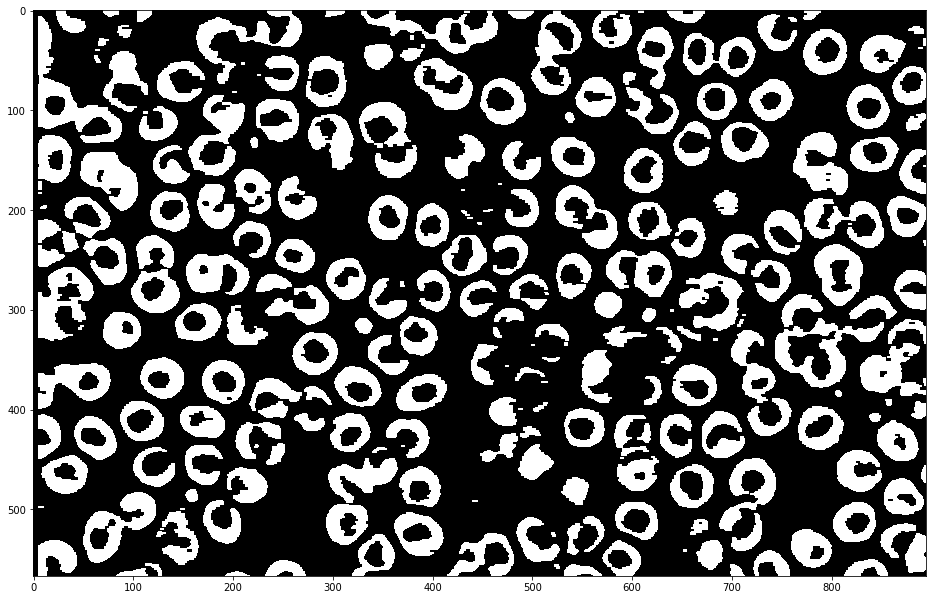

In [268]:
import matplotlib.pyplot as plt  
%matplotlib inline 

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16,12

import numpy as np
import cv2 # OpenCV biblioteka

img_blood = cv2.cvtColor(cv2.imread('../slike/bloodcells.jpg'), cv2.COLOR_BGR2RGB)
img_blood = img_blood[8:,:] #skinem gornju bijelu liniju
img_blood_gs = cv2.cvtColor(img_blood, cv2.COLOR_RGB2GRAY)

img_blood_bin = cv2.adaptiveThreshold(img_blood_gs, 255, cv2.ADAPTIVE_THRESH_MEAN_C , cv2.THRESH_BINARY_INV, 45,  5)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4, 2))

img_ero = cv2.erode(img_blood_bin, kernel, iterations=1)
img_ero = cv2.dilate(img_ero, kernel, iterations=1)
img_ero = cv2.erode(img_ero, kernel, iterations=2)
img_ero = cv2.dilate(img_ero, kernel, iterations=1)

plt.imshow(img_ero, 'gray')

Ukupan broj crvenih zrnaca: 235


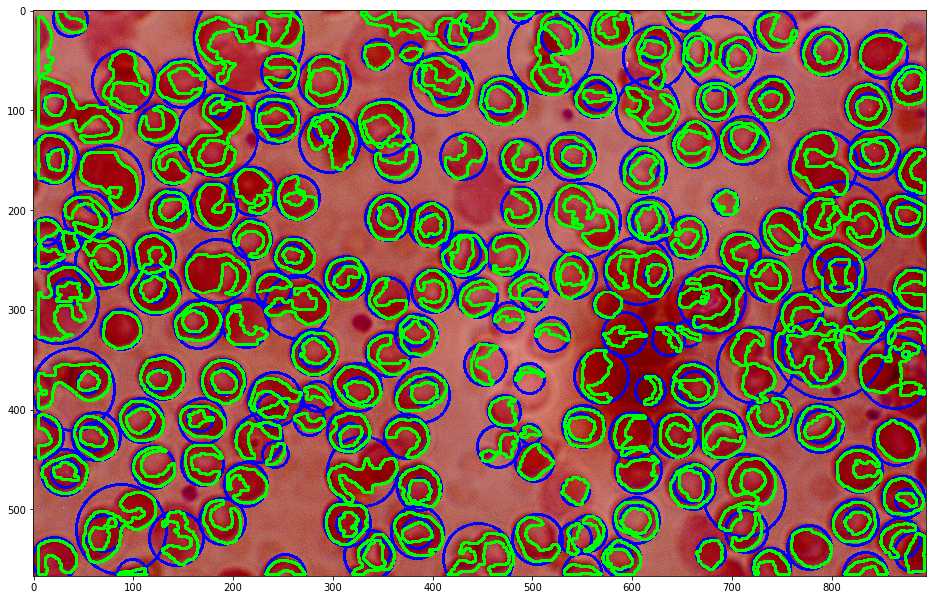

In [269]:
img, contours, hierarchy = cv2.findContours(img_ero, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img = img_blood.copy()

contours_blood = []
for contour in contours: 
    center, size, angle = cv2.minAreaRect(contour) 
    height, width = size
    area = cv2.contourArea(contour)
    x, y = center;
    if (width > 20 or height > 20) and width < 150 and height < 150:
        contours_blood.append(contour)
        
        (x,y),radius = cv2.minEnclosingCircle(contour)
        center = (int(x),int(y))
        radius = int(radius)
        if radius < 70:
            img = cv2.circle(img,center,radius,(0,0,255),2)
    
cv2.drawContours(img, contours_blood, -1, (0, 255, 0), 2)
plt.imshow(img)
print 'Ukupan broj crvenih zrnaca: %d' % len(contours_blood)